# Advance Airplane Price Prediction using Decision Tree  Algorithm

Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#rReading data
train_data=pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# From description we can see that Date_of_Journey is a object data type,

In [11]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [15]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [16]:
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-10-15 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-15 05:50:00,2021-10-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-10-15 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-15 18:05:00,2021-10-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-15 16:50:00,2021-10-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour

In [19]:
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [20]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [21]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(train_data,'Dep_Time')

In [22]:
# Extracting Minutes
extract_min(train_data,'Dep_Time')

In [23]:
# Now we can drop Dep_Time as it is of no use
drop_column(train_data,'Dep_Time')

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-10-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-10-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-10-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [25]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [27]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]     

In [28]:
train_data['Duration']=duration

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [30]:
def hr(x):
    return x.split(' ')[0][0:-1]


In [31]:
def min(x):
    return x.split(' ')[1][0:-1]

In [32]:
train_data['Duration_hours']=train_data['Duration'].apply(hr)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
train_data.drop('Duration',axis=1,inplace=True)

In [35]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [36]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_day          10682 non-null  int64 
 8   Journey_month        10682 non-null  int64 
 9   Dep_Time_hour        10682 non-null  int64 
 10  Dep_Time_minute      10682 non-null  int64 
 11  Arrival_Time_hour    10682 non-null  int64 
 12  Arrival_Time_minute  10682 non-null  int64 
 13  Duration_hours       10682 non-null  int32 
 14  Duration_mins        10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ M

# Handling Categorical Data

We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [38]:
train_data. Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

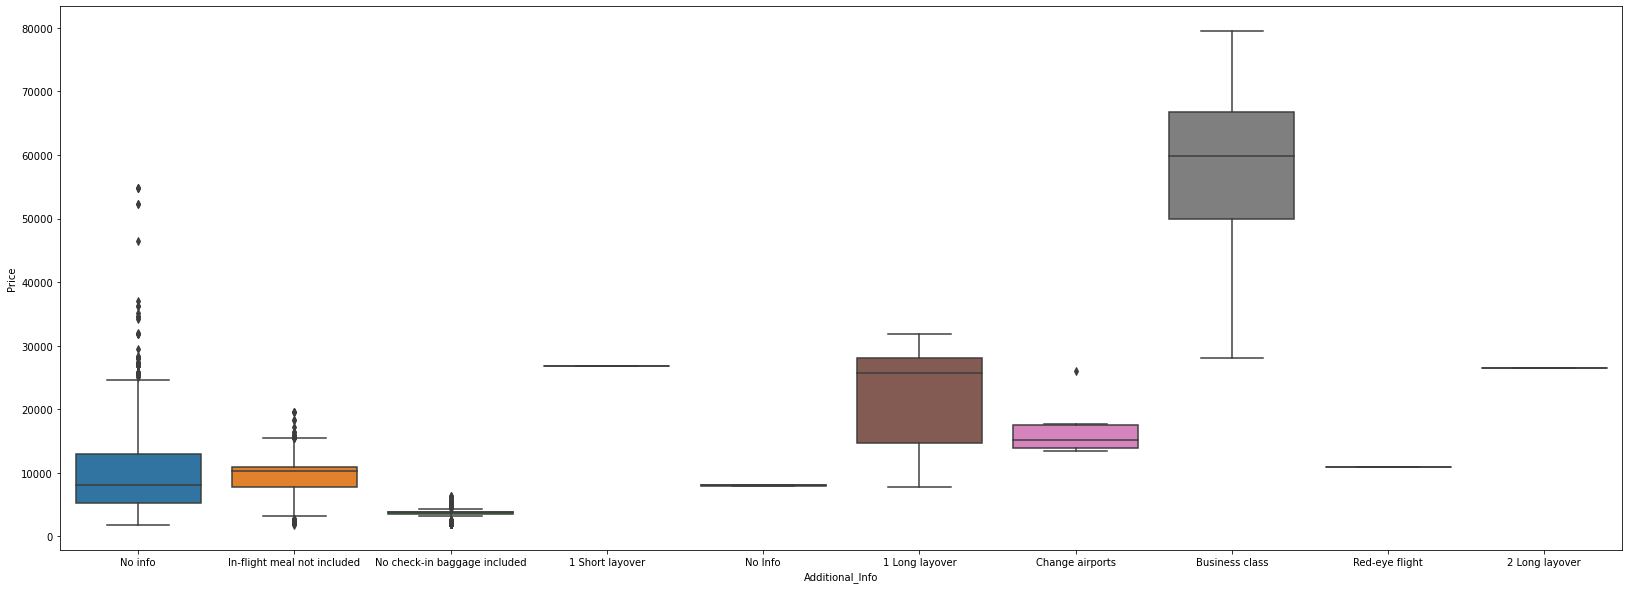

In [39]:
fig=plt.figure(figsize=(28,10))
sns.boxplot( x='Additional_Info',
    y='Price',
    data=train_data)
plt.tight_layout

In [40]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [41]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [42]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Airline vs Price Analysis

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

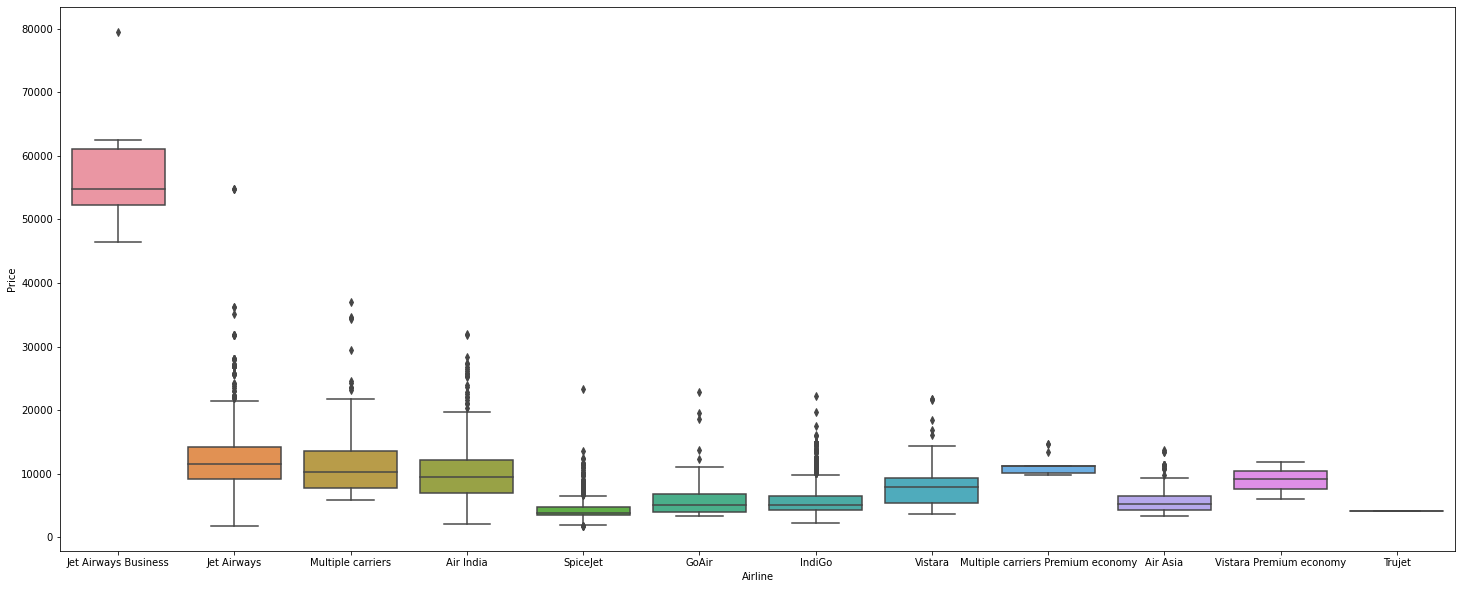

In [44]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

Perform Total_Stops vs Price Analysis

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

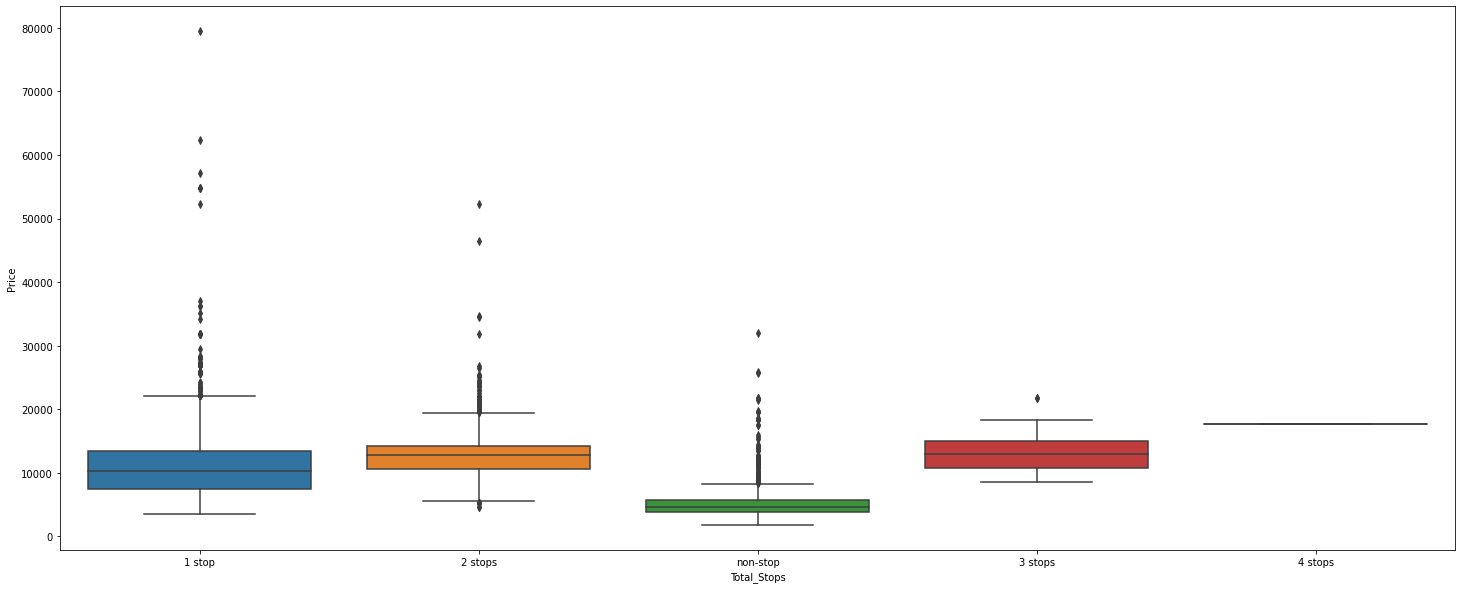

In [45]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout

In [46]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

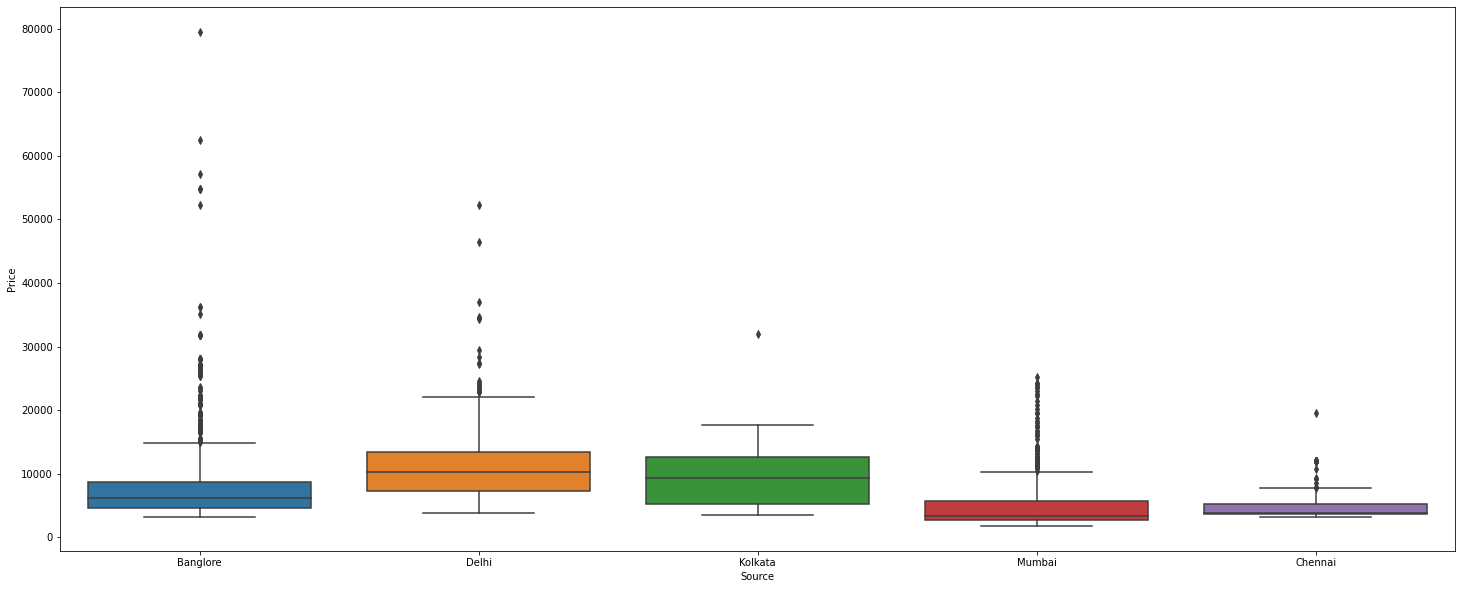

In [48]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout

In [49]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

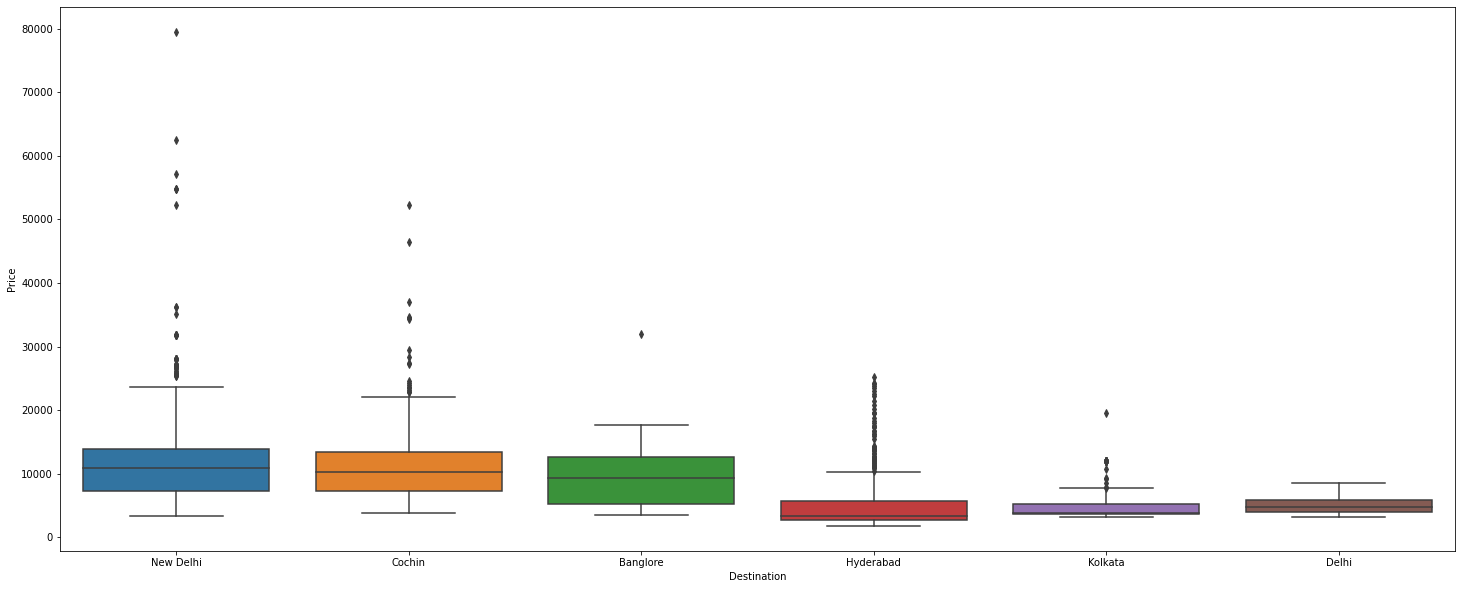

In [50]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False))
plt.tight_layout

In [51]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [54]:
categorical['Route'].str.split('→').str[1]

0          DEL
1         IXR 
2         LKO 
3         NAG 
4         NAG 
         ...  
10678      BLR
10679      BLR
10680      DEL
10681      DEL
10682     GOI 
Name: Route, Length: 10682, dtype: object

In [55]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [56]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [57]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [58]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [59]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [60]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



 as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [62]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [63]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [64]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [66]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [69]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [71]:
train_data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [72]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [73]:
data_train=data_train.drop(['Destination','Source','Airline'],axis=1)

In [74]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


# outlier detection

<AxesSubplot:xlabel='Price', ylabel='Density'>

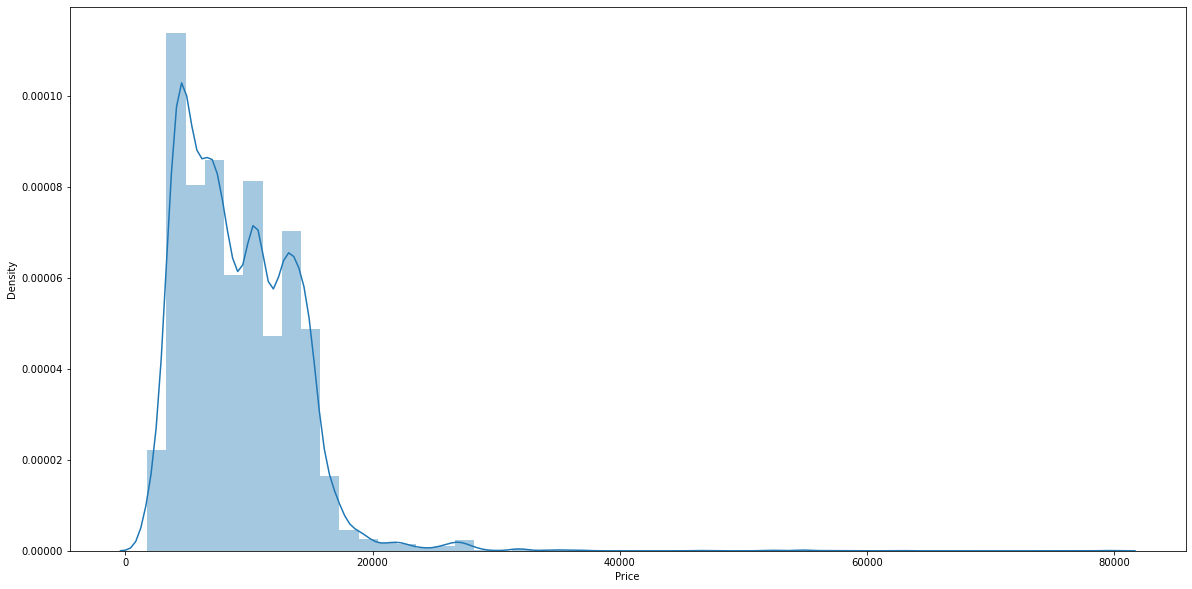

In [75]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data_train.Price)

<AxesSubplot:xlabel='Price'>

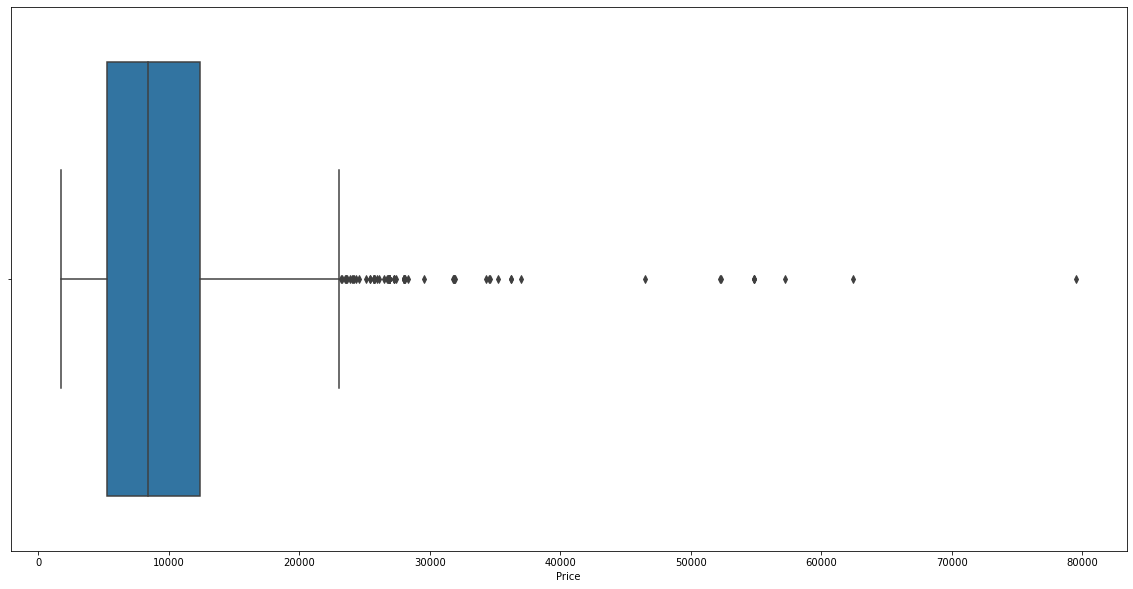

In [76]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data_train.Price)

In [77]:
data_train[data_train.Price>40000]

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
657,1,0,7,8,13,5,0,0,0,0,...,1,52229,3,1,5,45,10,45,5,0
1478,1,0,7,8,13,5,0,0,0,1,...,1,54826,18,3,18,40,0,45,6,5
2618,1,0,7,8,13,5,0,0,0,1,...,1,54826,18,3,22,50,5,5,6,15
2924,1,0,7,8,13,5,0,0,0,0,...,1,79512,3,1,5,45,11,25,5,40
5372,1,0,7,8,13,5,0,0,0,0,...,1,62427,3,1,5,45,12,25,6,40
5439,1,0,7,8,13,5,0,0,0,1,...,1,54826,3,1,16,55,23,0,6,5
7351,2,3,1,4,5,5,0,0,0,0,...,0,46490,3,3,20,5,4,25,8,20
9715,2,3,1,4,5,5,0,0,0,0,...,0,52285,3,6,20,5,4,25,8,20
10364,1,0,33,8,13,5,0,0,0,0,...,1,57209,3,1,9,45,14,25,4,40


In [78]:
data_train=data_train.drop([657,1478,2618,2924,5372,5439,7351,9715,10364])

In [79]:
data_train[data_train.Price>40000]

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins


<AxesSubplot:xlabel='Price', ylabel='Density'>

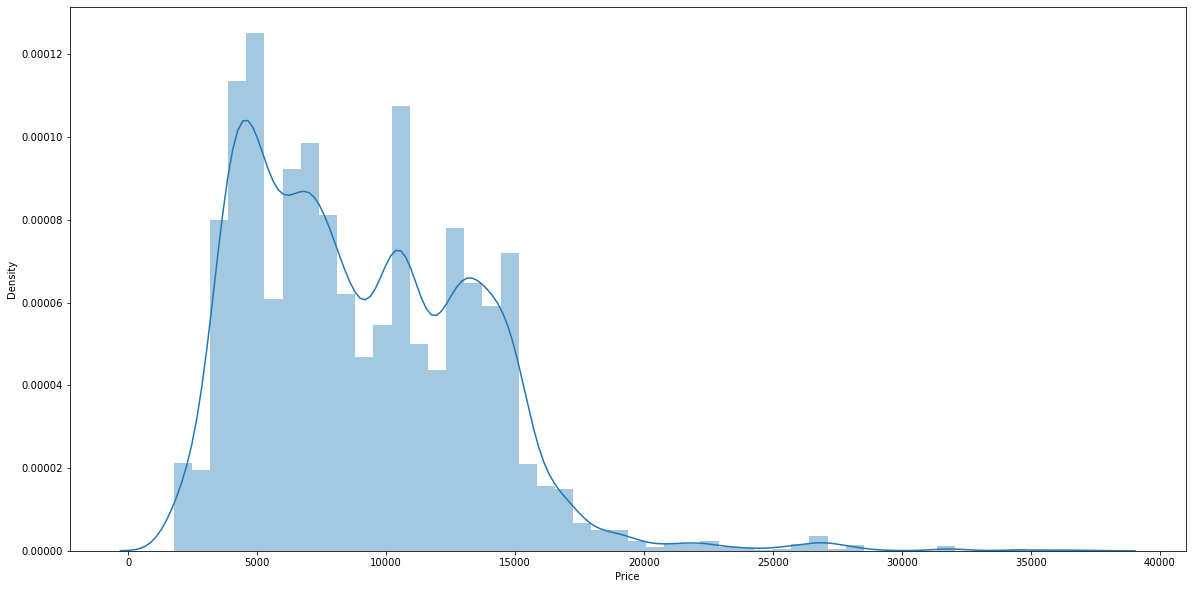

In [80]:
fig=plt.figure(figsize=(20,10))
sns.distplot(data_train.Price)

<AxesSubplot:xlabel='Price'>

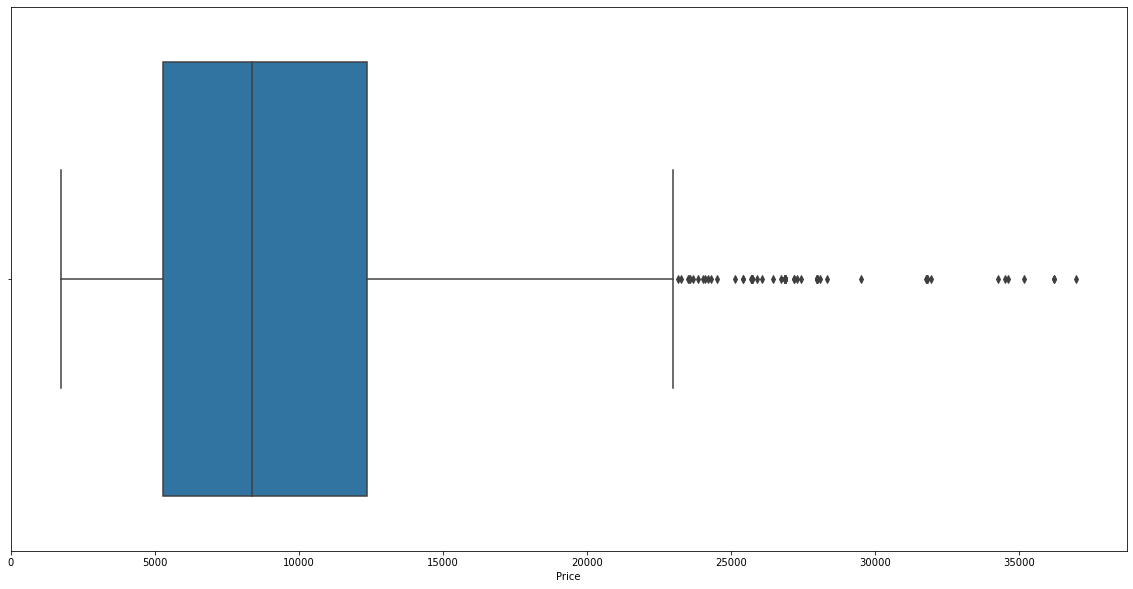

In [81]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data_train.Price)

In [82]:
### separate your independent & dependent data

In [83]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,0,1,3,1,16,50,21,35,4,45


In [84]:
y=data_train['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10673, dtype: int64

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10673 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10673 non-null  int64
 1   Route_1                            10673 non-null  int32
 2   Route_2                            10673 non-null  int32
 3   Route_3                            10673 non-null  int32
 4   Route_4                            10673 non-null  int32
 5   Route_5                            10673 non-null  int32
 6   Air India                          10673 non-null  uint8
 7   GoAir                              10673 non-null  uint8
 8   IndiGo                             10673 non-null  uint8
 9   Jet Airways                        10673 non-null  uint8
 10  Jet Airways Business               10673 non-null  uint8
 11  Multiple carriers                  10673 non-null  uint8
 12  Multiple carriers 

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

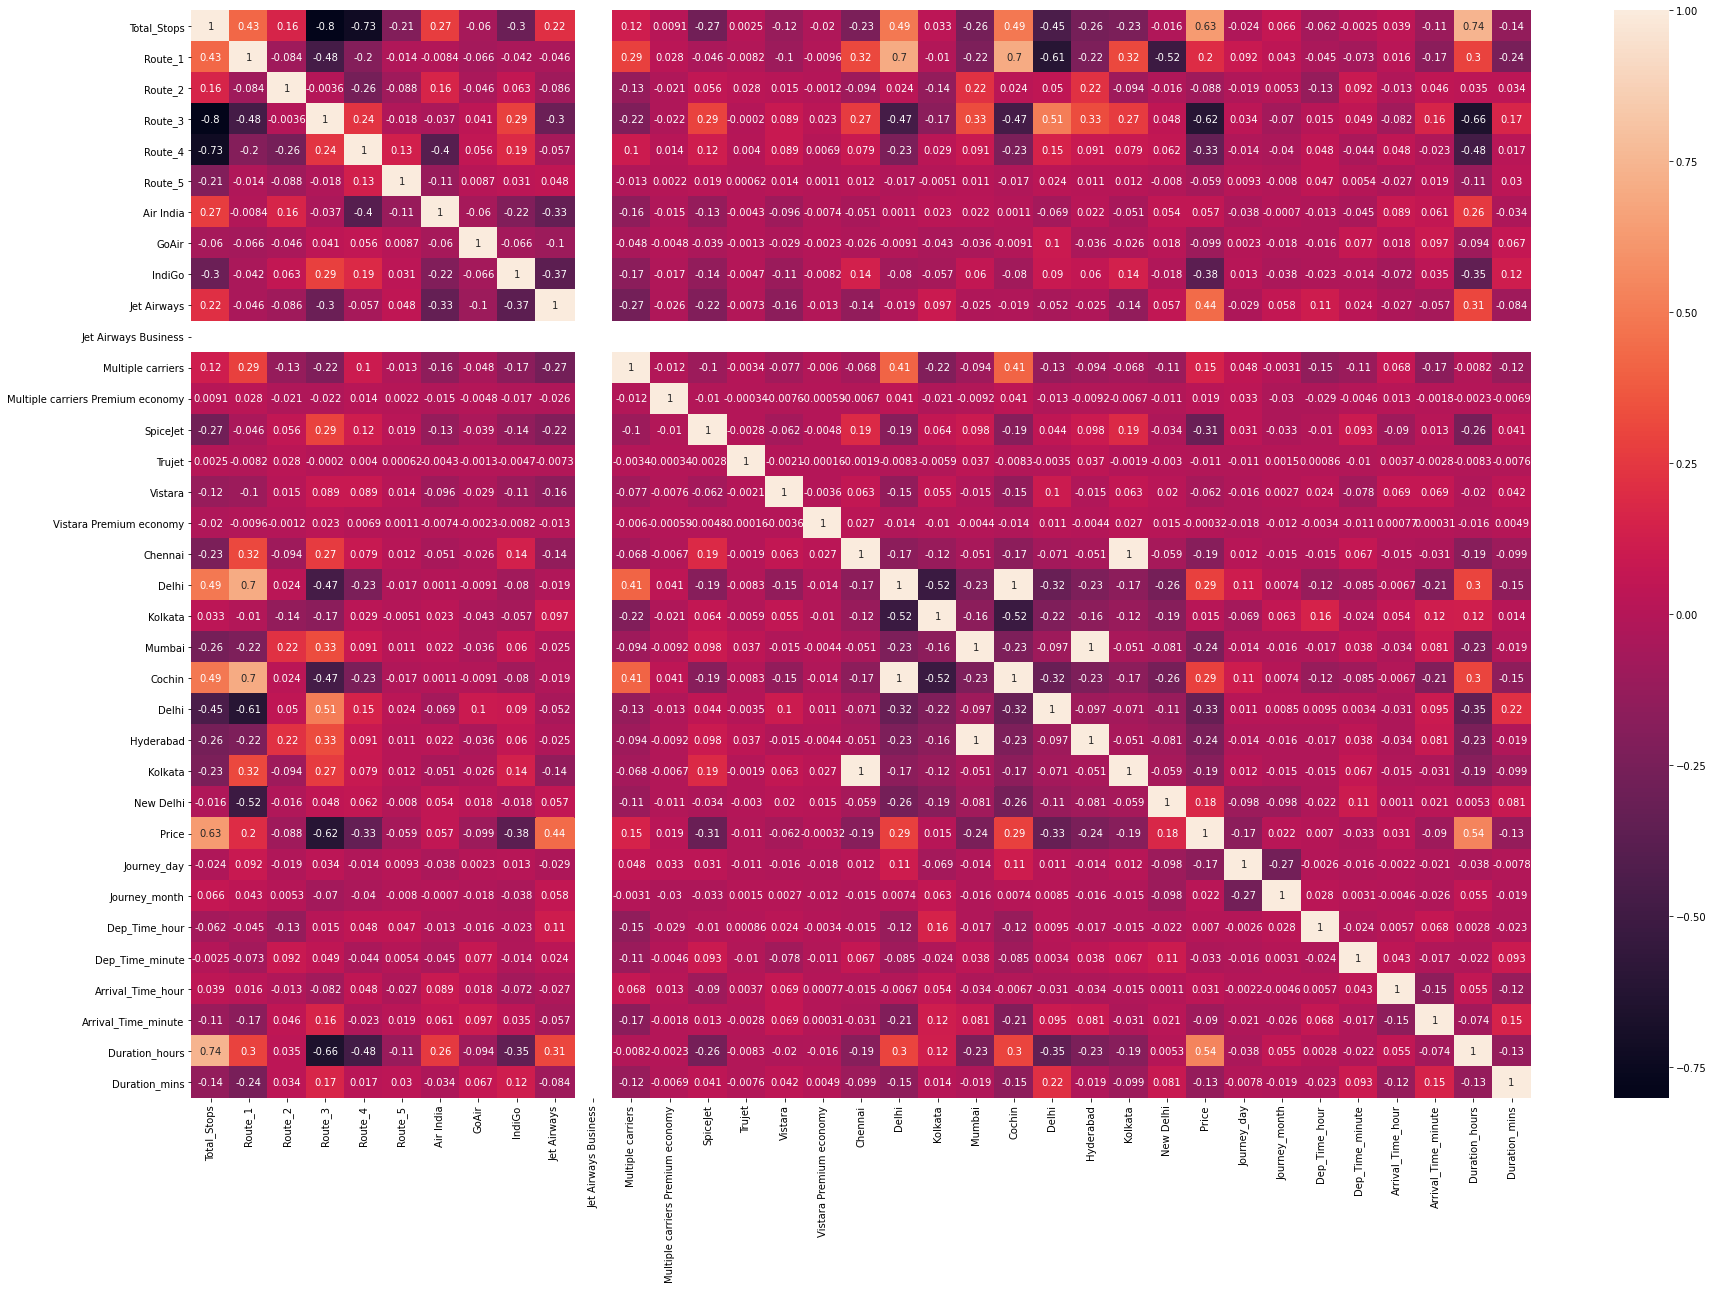

In [86]:
fig=plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(),annot=True)
plt.tight_layout

In [87]:
data_train.corr(method='spearman')['Price'].sort_values(ascending=False)

Price                                1.000000
Total_Stops                          0.715768
Duration_hours                       0.692315
Jet Airways                          0.461110
Cochin                               0.347276
Delhi                                0.347276
Route_1                              0.262042
Multiple carriers                    0.175008
New Delhi                            0.124513
Air India                            0.076352
Journey_month                        0.068688
Kolkata                              0.041131
Arrival_Time_hour                    0.041022
Multiple carriers Premium economy    0.023595
Dep_Time_hour                        0.007500
Vistara Premium economy              0.001212
Trujet                              -0.012759
Vistara                             -0.053227
Dep_Time_minute                     -0.062842
Route_5                             -0.065130
Arrival_Time_minute                 -0.103720
GoAir                             

Feature Selection using Information Gain

In [88]:
from sklearn.feature_selection import mutual_info_classif

In [89]:
mutual_info_classif(X,y)

array([2.14470614, 2.04202882, 2.78367626, 2.24376188, 1.44810827,
       0.80924717, 0.75885294, 0.09330855, 0.66191739, 0.93347042,
       0.00939635, 0.57152879, 0.00454347, 0.31668353, 0.00332449,
       0.23567252, 0.01802056, 0.17309598, 1.57322042, 0.89626166,
       0.28459426, 1.53742967, 0.40533974, 0.30041027, 0.1515937 ,
       0.39375516, 1.09438974, 0.86443135, 1.41478207, 1.20741734,
       1.85001306, 1.53118537, 1.77125889, 1.08647396])

In [90]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.152397
Route_1,2.027538
Route_2,2.726370
Route_3,2.288220
Route_4,1.501345
Route_5,0.731162
Air India,0.767556
GoAir,0.094661
IndiGo,0.678993
Jet Airways,0.915850


Saving The Data

In [87]:
data_train.to_csv('flight_train_data.csv',index=False)

# split dataset into train & test

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\End-2-end Projects\Flight_Price/model.pkl','wb')
        pickle.dump(model,file)

In [94]:
#Importing Decision Tree  Algorithm

In [95]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9686302390752211
predictions are: 
 [ 7888. 11738.  4049. ...  3857.  9646.  6218.]


r2 score: 0.7080143939037536
MAE: 1321.97018735363
MSE: 5688879.328549441
RMSE: 2385.13717185185


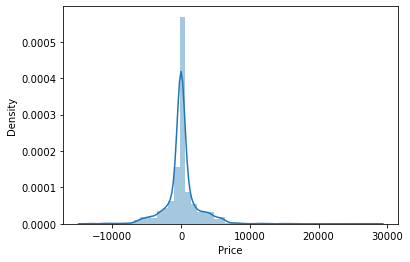

In [96]:
predict(DecisionTreeRegressor(),0)

In [97]:
##############################################################

WE CAN ALSO PLAY WITH MULTIPLE ALGOS

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Training score : 0.6199340860793222
predictions are: 
 [10194.54788987 11941.2582878   2949.13073519 ...  3475.11744725
 10024.14528061  5897.23442577]


r2 score: 0.601658241099029
MAE: 1932.6949441389256
MSE: 7761061.335204261
RMSE: 2785.868147490879


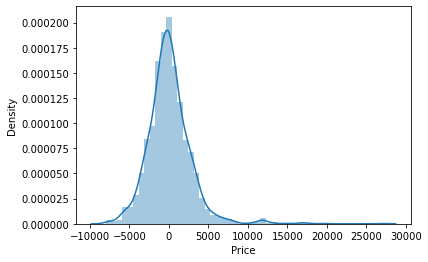

In [100]:
predict(LinearRegression(),0)